In [1]:
import pandas as pd
import numpy as np

In [9]:
train = pd.read_csv('d:/dataset/house_prices/train.csv')
test = pd.read_csv('d:/dataset/house_prices/test.csv')

In [10]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# We can use Series.describe() to get more information.

In [13]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# checking for skewness, which is a measure of the shape of the distribution of values.

In [14]:
print ("Skew is:", train.SalePrice.skew())
#plt.hist(train.SalePrice, color='blue')
#plt.show()

Skew is: 1.8828757597682129


# ploting the graph to see the skewness

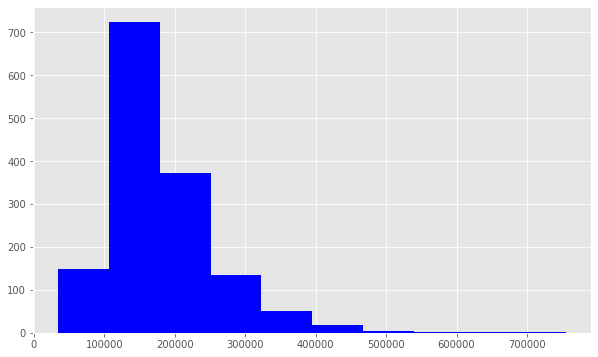

In [15]:
#print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

# Now we use np.log() to transform train.SalePric and calculate the skewness a second time, 
# as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. 
# We can see visually that the data will more resembles a normal distribution.

In [16]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())

Skew is: 0.12133506220520406


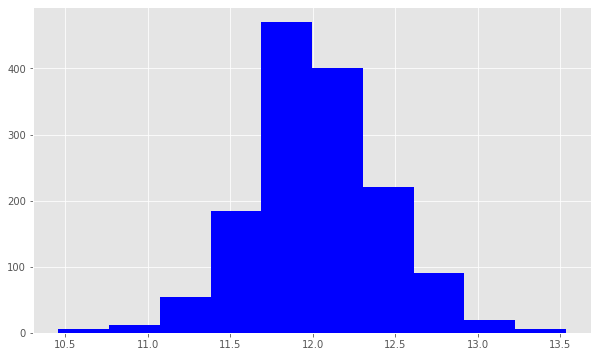

In [17]:
plt.hist(target, color='blue')
plt.show()

# Working with Numeric Features .select_dtypes()

In [18]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

# The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [19]:
corr = numeric_features.corr()

In [20]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [21]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated

# digging deeper on OverallQual.using the .unique() method to get the unique values.

In [22]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

# creating a pivot table to further show the relationship between OverallQual and SalePrice. setting index='OverallQual' and values='SalePrice'. look at the median here.

In [23]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [24]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


# To visualize this pivot table more easily, create a bar plot using the Series.plot() method.

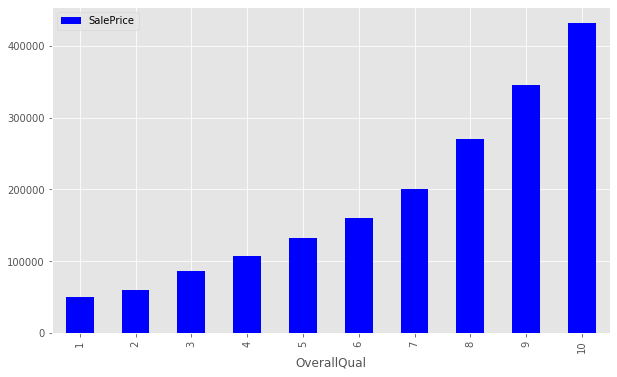

In [25]:
quality_pivot.plot(kind='bar', color='blue')

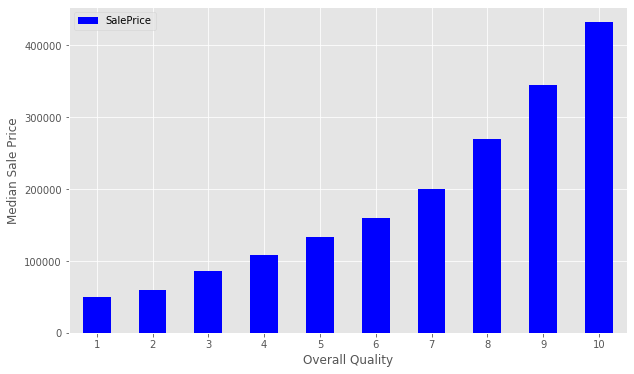

In [26]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# Next, use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

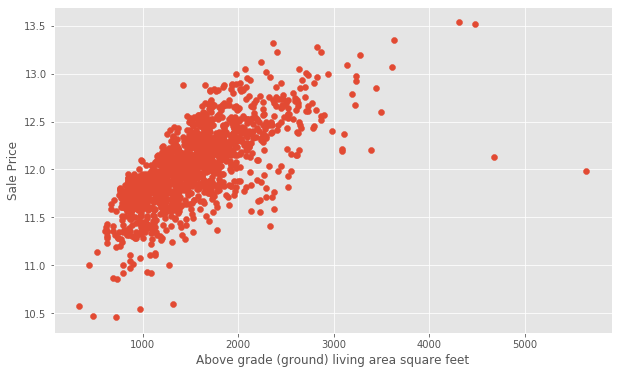

In [27]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

# At first glance, we see increases in living area correspond to increases in price. We will do the same for GarageArea.

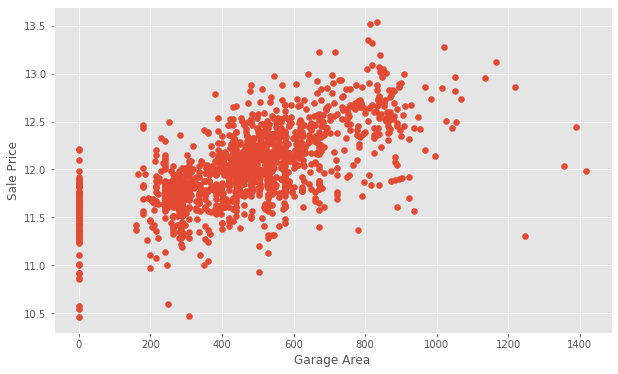

In [28]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

# checking for GarageArea which is less than 1200

train = train[train['GarageArea'] < 1200]

In [29]:
train = train[train['GarageArea'] < 1200]

In [30]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [31]:
len(train)

1455

# ploting the above in a graph

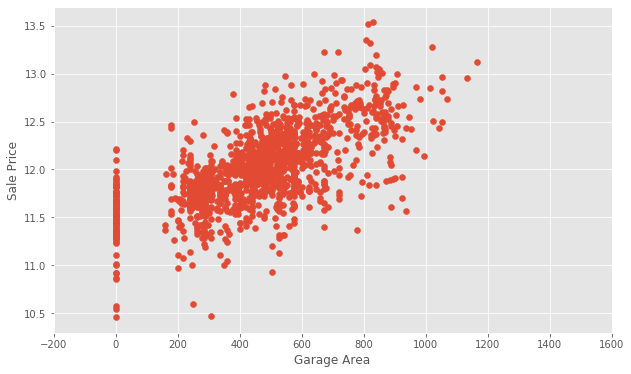

In [32]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


# Data Wrangling - Handling Null Values

In [33]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [34]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1364
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       689
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# create a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, return a Series of the counts of the null values in each column.and sorting the values ,not in ascending oder

In [35]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'


In [36]:
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [37]:
len(nulls)

25

# The documentation can help us understand the missing values. In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
# We can find a similar relationship between many of the Garage-related columns.

# Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.

In [38]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


# using the documentation to find out what these values indicate:

# MiscFeature: Miscellaneous feature not covered in other categories

 #  Elev Elevator
  # Gar2 2nd Garage (if not described in garage section)
  # Othr Other
  # Shed Shed (over 100 SF)
  # TenC Tennis Court
  # NA   None

# Wrangling the non-numeric Features

In [39]:
# considering  non-numeric features first.
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


# The count column indicates the count of non-null observations, while unique counts the number of unique values. top is the most commonly occurring value, with the frequency of the top value shown by freq.

# using one-hot encoding to make use of the information for modeling.
# One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

# any changes to train data should as well be applied to test data

# Transforming and engineering features

# considering the Street data, which indicates whether there is Gravel or Paved road access to the property.

In [40]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



#  creating a new column called enc_street. The pd.get_dummies() method will handle this by droping the first column .

In [41]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [42]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


In [43]:
print ('Encoded: \n')
print (test.enc_street.value_counts())

Encoded: 

1.0    1449
0.0       5
Name: enc_street, dtype: int64


# We’ve engineered our first feature! Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

#  engineering another feature.  look at SaleCondition by constructing and plotting a pivot table, as done above for OverallQual.

In [44]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)

In [45]:
condition_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,242300


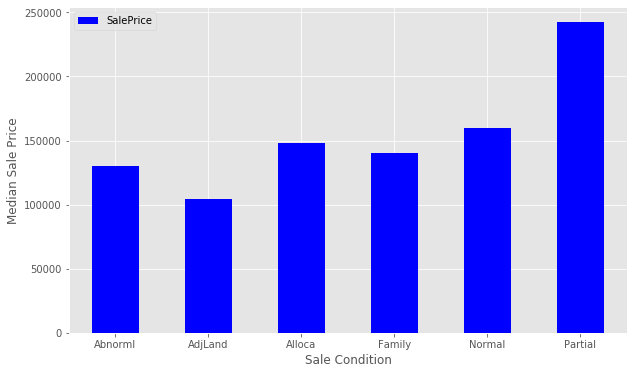

In [46]:
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# using a function to select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0 .

In [47]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

# exploring this new feature as a plot.

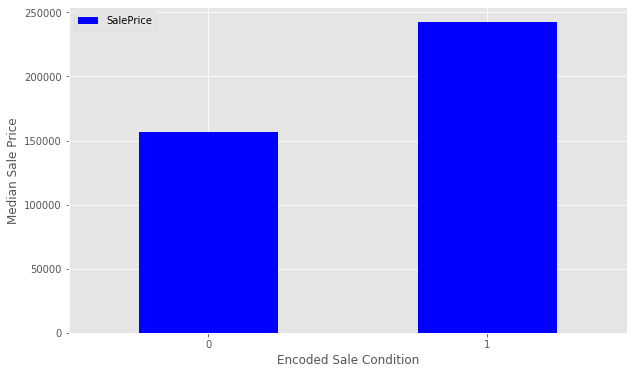

In [48]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# Before  preparing the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

In [49]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [50]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1,0
7,8,60,63.0,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1,0


# Check if the all of the columns have 0 null values.

In [53]:
sum(data.isnull().sum() != 0)

0

# Build a linear model

# preparing the data for modeling.  separate the features and the target variable for modeling. Assign the features to X and the target variable to y.Use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns to exclude.Dont include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [57]:
y = np.log(train.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis=1)

In [58]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [59]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,30,0,320,0,0,700,10,2009,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,57,0,0,0,0,0,8,2007,1,0
7,60,63.0,10382,7,6,1973,1973,240.0,859,32,...,204,228,0,0,0,350,11,2009,1,0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,205,0,0,0,0,4,2008,1,0
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,4,0,0,0,0,0,1,2008,1,0


# Data Traing

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

# using linear regression

In [64]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

# fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [65]:
model = lr.fit(X_train, y_train)

# Evaluate the performance and visualize results

# model.score() method returns the r-squared value by default.

In [67]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926258


# consider rmse. To do so, use the model we have built to make predictions on the test data set.

In [69]:
predictions = model.predict(X_test)

# The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

# The mean_squared_error function takes two arrays and calculates the rmse.

In [70]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567168


# Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

# We can view this relationship graphically with a scatter plot.

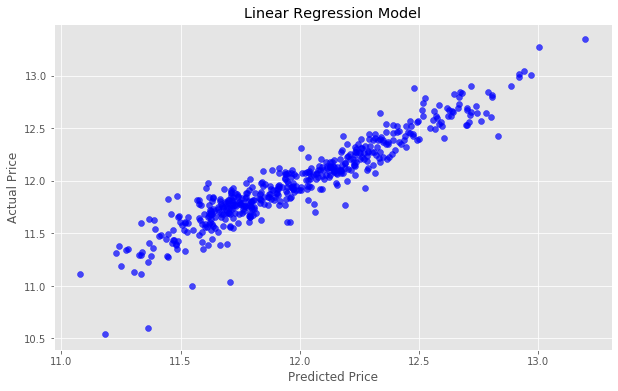

In [72]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# We’ll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

# We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.

# We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

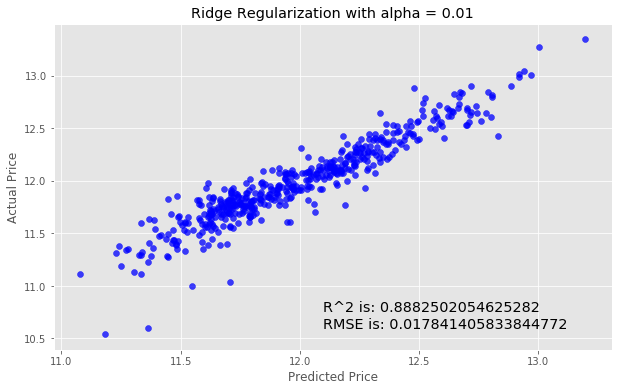

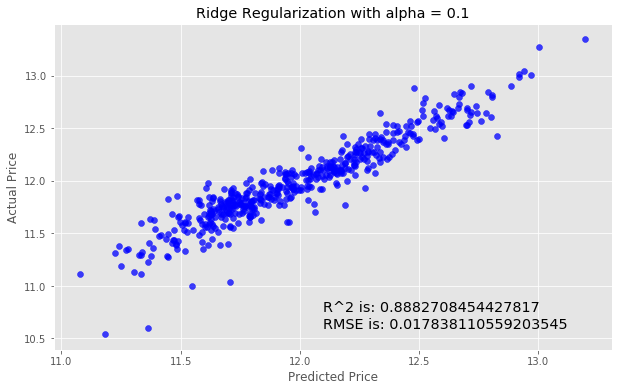

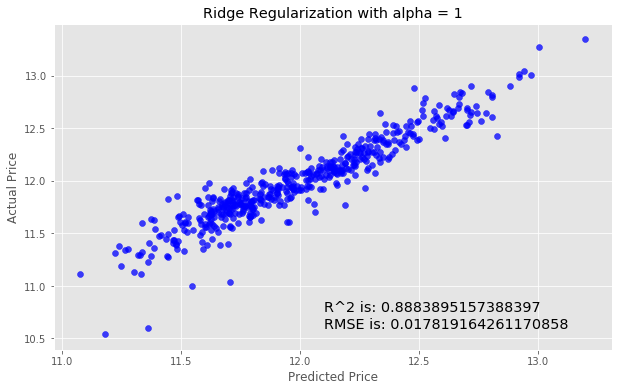

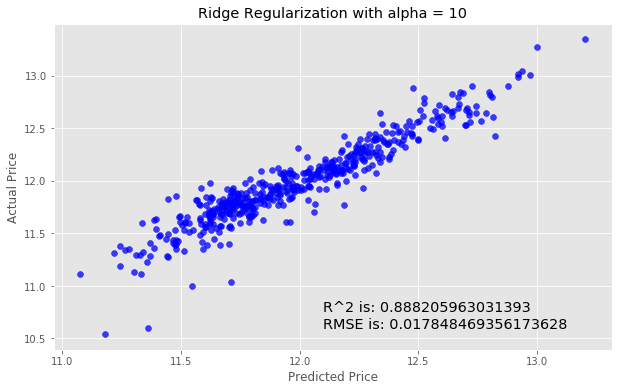

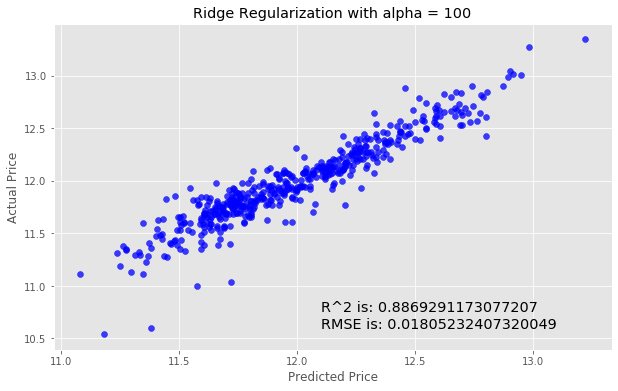

In [73]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# Make a submission

# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

# log in to our Kaggle account and go to the submission page to make a submission.
# use the DataFrame.to_csv() to create a csv to submit.
# The first column must the contain the ID from the test data.

In [74]:
submission = pd.DataFrame()
submission['Id'] = test.Id

# Now, select the features from the test data for the model as we did above.

In [76]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

# Next, we generate our predictions.

In [78]:
predictions = model.predict(feats)

#  transform the predictions to the correct form. Remember that to reverse log() we do exp().
# So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [79]:
final_predictions = np.exp(predictions)

In [80]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172586 122920.74024357 175704.82598102 200050.83263755
 182075.46986405]


# Lets assign these predictions and check that everything looks good.

In [81]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [82]:
submission.to_csv('submission1.csv', index=False)